<a href="https://colab.research.google.com/github/Maxie503/DSA---Mock-Test-1---Python/blob/main/Customer%20ChurnRate%20NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [5]:
df =pd.read_csv("/content/Churn_Modelling.csv")

In [6]:
df.shape

(10002, 14)

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [9]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [10]:
df['Exited'].value_counts()

,count
Exited,
0,7959
1,2037


In [11]:
df['Geography'].value_counts()

,count
Geography,
France,5011
Germany,2509
Spain,2476


In [12]:
df['Gender'].value_counts()

,count
Gender,
Male,5454
Female,4542


In [13]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [15]:
df= pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [16]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,False,False,False
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,True,False
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,False,False,False
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,False,False,False
5,645,44.0,8,113755.78,2,1.0,0.0,149756.71,1,False,True,True


In [17]:
np.any(np.isnan(df))

False

In [18]:
from sklearn.model_selection import train_test_split
X, y = df.drop(columns=['Exited']),df['Exited']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [20]:
X.shape

(9996, 11)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
X_train_scaled

array([[-1.04670021,  0.56704278, -0.68806778, ...,  1.72744198,
        -0.57446206, -1.09559583],
       [ 1.82523807, -0.19086305, -0.34308471, ..., -0.57889064,
        -0.57446206,  0.91274535],
       [ 2.05169915, -1.61193649,  0.6918645 , ...,  1.72744198,
        -0.57446206,  0.91274535],
       ...,
       [ 1.59877698, -1.3277218 ,  0.6918645 , ..., -0.57889064,
         1.74075901,  0.91274535],
       [ 0.70322634, -1.61193649,  0.6918645 , ..., -0.57889064,
        -0.57446206, -1.09559583],
       [ 0.53852737, -1.04350712, -1.03305085, ..., -0.57889064,
        -0.57446206,  0.91274535]])

In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential()

In [25]:
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
 model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [28]:
hist = model.fit(X_train_scaled,y_train,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6439 - loss: 0.6544 - val_accuracy: 0.8100 - val_loss: 0.5588
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7996 - loss: 0.5450 - val_accuracy: 0.8100 - val_loss: 0.4964
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7979 - loss: 0.4975 - val_accuracy: 0.8100 - val_loss: 0.4667
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7983 - loss: 0.4733 - val_accuracy: 0.8100 - val_loss: 0.4493
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7933 - loss: 0.4646 - val_accuracy: 0.8106 - val_loss: 0.4378
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8016 - loss: 0.4418 - val_accuracy: 0.8106 - val_loss: 0.4293
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8014 - loss: 0.4362 - val_accuracy: 0.8131 - val_loss: 0.4228
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8023 - loss: 0.4361 - val_accu

In [29]:
model.layers[0].get_weights()

[array([[ 4.7469392e-02,  5.8042523e-02, -2.7990218e-02],
        [-1.8823016e-02,  4.9179146e-01,  3.0974252e+00],
        [ 2.9636412e-03,  1.4179800e-01, -2.4468400e-02],
        [-7.8956294e-01,  1.2570852e+00,  1.6004127e-01],
        [-1.0749725e+00,  3.8067667e+00,  6.8003100e-01],
        [ 5.5592887e-02, -5.7855617e-02, -4.4793993e-02],
        [ 9.3469197e-01,  6.1351430e-01,  3.3729604e-01],
        [ 7.5784951e-02, -6.3507847e-02,  3.6368668e-02],
        [-2.9725668e-01, -9.3256313e-01, -1.5247551e-01],
        [-3.0544072e-01,  2.1545406e-01, -1.7473093e-01],
        [ 3.4676602e-01,  2.5366605e-03, -9.3482718e-02]], dtype=float32),
 array([ 1.0715101 ,  1.9381032 , -0.42002112], dtype=float32)]

In [30]:
model.layers[1].get_weights()

[array([[-2.6161234],
        [-2.893912 ],
        [ 3.0631278]], dtype=float32),
 array([0.5595814], dtype=float32)]

In [31]:
 y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [32]:
y_pred = np.where(y_log>0.5,1,0)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.852

In [34]:
import matplotlib.pyplot as plt

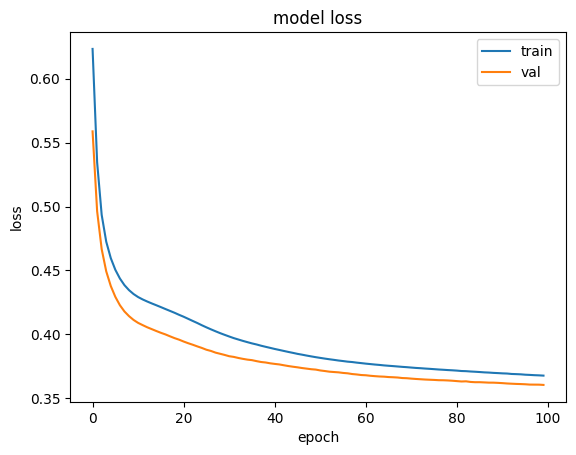

In [35]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper right')
plt.show()

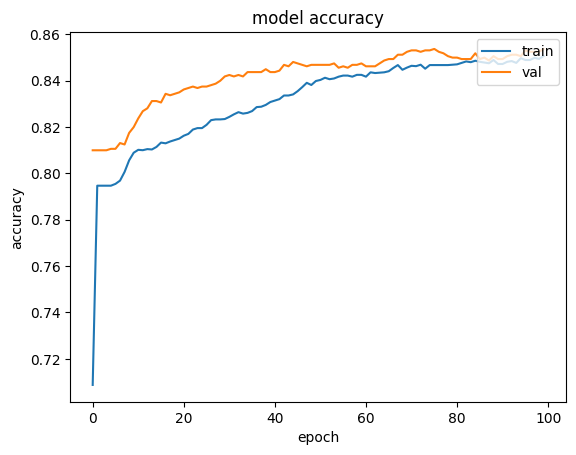

In [36]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper right')
plt.show()